In [1]:
import numpy as np
from mpmath import *
import scipy.stats as stats
import matplotlib.pyplot as plt 
from texttable import Texttable


In [2]:
N = 100 #population size
M = 15 #Number of success in the populatrion
n  = 10 #number of draws

num_samples = stats.hypergeom(N,M,n)
samples_rv = 20
x_values = num_samples.rvs(size=samples_rv)

In [3]:
lambd = np.random.random(1).round(2)
#x_values = np.linspace(1, n+1 ,100)

def hypergeom(x_values):  
    return x_values*lambd**(x_values-1)*(1-lambd)**2
sum_hypergeo = hypergeom(x_values)
print(f'for x hypergeometric random varibale value:\n {[x_values[i] for i in x_values]} \n Give a prob : \n {sum_hypergeo}')

for x hypergeometric random varibale value:
 [2, 4, 1, 3, 2, 4, 4, 4, 3, 2, 2, 2, 1, 4, 2, 4, 2, 2, 4, 4] 
 Give a prob : 
 [0.8464     0.135424   0.00173343 0.01625088 0.8464     0.135424
 0.135424   0.135424   0.01625088 0.8464     0.8464     0.8464
 0.         0.135424   0.8464     0.135424   0.8464     0.8464
 0.135424   0.135424  ]


In [19]:
k = 1
def moment_func(x_values, k):
    return sum_hypergeo*(1/(x_values + A)**k)

+------------------------+--------------------------+--------------------------+
| положительный чисел A  |    X random variables    | Обратный момент E(1/X+A) |
+========================+==========================+==========================+
| A1 = 1                 | [1 2 4 3 1 2 2 2 3 1 1 1 | [0.14106667 0.01934629   |
|                        | 0 2 1 2 1 1 2 2]         | 0.0001926  0.00203136    |
|                        |                          | 0.14106667 0.01934629    |
|                        |                          |  0.01934629 0.01934629   |
|                        |                          | 0.00203136 0.14106667    |
|                        |                          | 0.14106667 0.14106667    |
|                        |                          |  0.         0.01934629   |
|                        |                          | 0.14106667 0.01934629    |
|                        |                          | 0.14106667 0.14106667    |
|                        |  

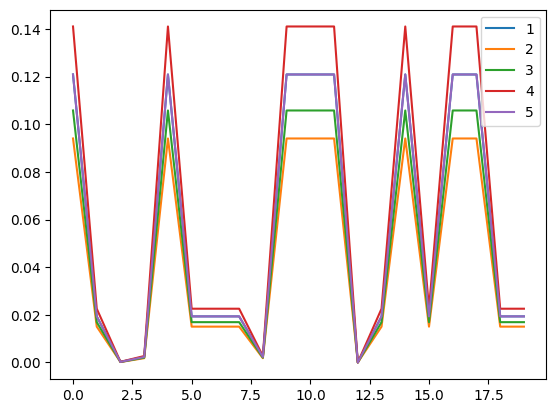

In [20]:
A = 5
results = [[ "положительный чисел A ","X random variables ", "Обратный момент E(1/X+A)"]]
for interger in range(1, A+1):
    first_moment = moment_func(x_values[interger], k)
    results.append(["A1 = {0}".format(interger),"{}".format(x_values), "{}".format(moment_func(x_values, k))])
    
    plt.plot( first_moment, label= interger)
    plt.legend()
results_table = Texttable() 
results_table.add_rows(results)
plt.savefig('first_moment_hypergeo.png')
#results_table.to_csv('data.csv')
print(results_table.draw())

In [6]:
k = 2
def moment_func(x_values):
    return sum_hypergeo*(1/(x_values + A)**k)

+---------+----------------------------------+---------------------------------+
|  (A ):  |        X random variables        |    обратный момент E(1/X+A)     |
+=========+==================================+=================================+
| A1 = 1  | [1 2 4 3 1 2 2 2 3 1 1 1 0 2 1 2 | [6.99504132e-03 9.40444444e-04  |
|         | 1 1 2 2]                         | 8.84401633e-06 9.61590533e-05   |
|         |                                  |  6.99504132e-03 9.40444444e-04  |
|         |                                  | 9.40444444e-04 9.40444444e-04   |
|         |                                  |  9.61590533e-05 6.99504132e-03  |
|         |                                  | 6.99504132e-03 6.99504132e-03   |
|         |                                  |  0.00000000e+00 9.40444444e-04  |
|         |                                  | 6.99504132e-03 9.40444444e-04   |
|         |                                  |  6.99504132e-03 6.99504132e-03  |
|         |                 

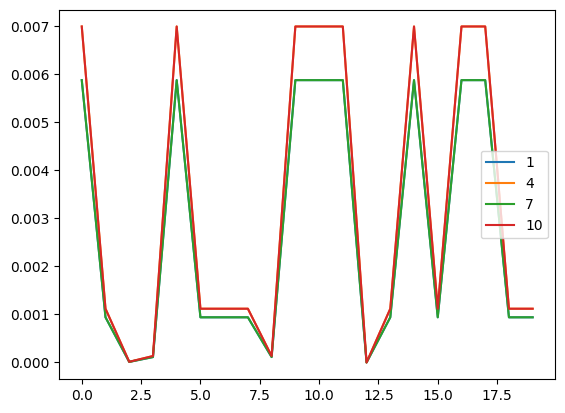

In [7]:
A = 10
results = [[ " (A ):","X random variables ", "обратный момент E(1/X+A)"]]
for interger in range(1, A+1, 3):
    first_moment = moment_func(x_values[interger])
    results.append(["A1 = {0}".format(interger),"{}".format(x_values), "{}".format(moment_func(x_values))])
    
    plt.plot( first_moment, label= interger)
    plt.legend()
results_table = Texttable() 
results_table.add_rows(results)
plt.savefig('second_moment_hypergeo.png')
print(results_table.draw())

AttributeError: 'list' object has no attribute 'data'

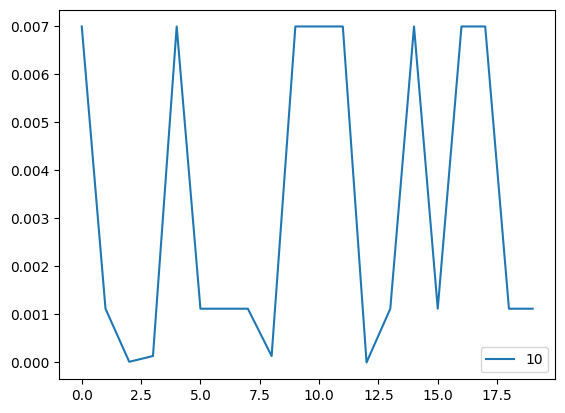

In [8]:
import matplotlib.animation as animation


fig, ax=plt.subplots()


line2 = ax.plot(first_moment, label= interger)
ax.legend()

def animate(x_values):
    
    line2.data(first_moment)
    return line2
ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)
ani.save("movie.pm4")
plt.show()
